In [75]:
import pandas as pd
import numpy as np
data = pd.read_csv('../../data.csv')
data_extract = pd.concat(\
    [data['Source'],\
        data['Epoch Time'].astype(np.float64),\
            pd.to_datetime(data['Arrival Time']).astype('int64'),\
                data['smpCnt'], \
    data['value'].str.split(',', expand=True)\
        .add_prefix('A')\
            .astype(np.float64)], axis=1)
data_name = data_extract\
    .replace("6c:fe:54:0e:26:b1", "VMU", regex=True)\
    .replace("OMICRONe_00:e9:33", "OMICRON", regex=True)\
    .replace("Vizimax_00:57:00", "VIZIMAX", regex=True)

/opt/conda/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [80]:
data_name[['Arrival Time','A0']]

,Arrival Time,A0
0,1649777324873991000,-2308.0
1,1649777324873992000,0.0
2,1649777324873993000,4311.0
3,1649777324873993000,0.0
4,1649777324874038000,577.0
...,...,...
107827,1649777333854105000,0.0
107828,1649777333854552000,2814.0
107829,1649777333854553000,457.0
107830,1649777333854553000,0.0


<AxesSubplot:xlabel='Arrival Time'>

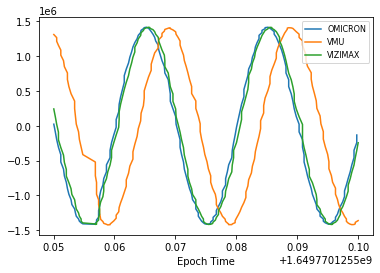

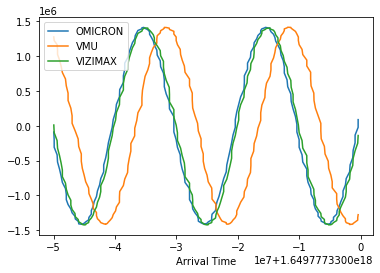

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
debut_ptp = 1649770125.55
fin_ptp = 1649770125.6
debut_wireshark = 1649777329950000
fin_wireshark =   1649777330000000
epoch_plot = data_name[(data_name['Source'] == 'OMICRON') & (data_name['Epoch Time'].between(debut_ptp,fin_ptp))]\
    .plot(x = 'Epoch Time', y = 'A0', label='OMICRON')
data_name[(data_name['Source'] == 'VMU') &  (data_name['Epoch Time'].between(debut_ptp,fin_ptp))]\
    .plot(ax=epoch_plot,x = 'Epoch Time', y = 'A0',label='VMU')
data_name[(data_name['Source'] == 'VIZIMAX') & (data_name['Epoch Time'].between(debut_ptp,fin_ptp))]\
    .plot(ax=epoch_plot,x = 'Epoch Time', y = 'A0',label='VIZIMAX')
epoch_plot.legend(loc=1, prop={'size': 8})


arrival_plot = data_name[(data_name['Source'] == 'OMICRON') & (data_name['Arrival Time'].between(debut_wireshark*1000,fin_wireshark*1000))]\
    .plot(x = 'Arrival Time', y = 'A0',label='OMICRON')
data_name[(data_name['Source'] == 'VMU') & (data_name['Arrival Time'].between(debut_wireshark*1000,fin_wireshark*1000))]\
    .plot(ax=arrival_plot,x = 'Arrival Time', y = 'A0',label='VMU')
data_name[(data_name['Source'] == 'VIZIMAX') & (data_name['Arrival Time'].between(debut_wireshark*1000,fin_wireshark*1000))]\
    .plot(ax=arrival_plot,x = 'Arrival Time', y = 'A0',label='VIZIMAX')

